# Week 3a: Preset Multilayered Perceptrons

## The network structure

![Multilayered perceptron for XOR](images/multilayered_perceptron_for_xor.png)

## Import libraries

- `matplotlib` is used for plotting

In [1]:
import matplotlib.pyplot as plot

## Define variables

- `rows`, the dataset of the XOR function (false=0, true=1)
- `activation`, the activation function, here the step function
- `weights`, the weights of all three perceptrons

In [2]:
rows = [ 
    { 'x0': 1, 'x1': 0, 'x2': 0, 'target': 0 },
    { 'x0': 1, 'x1': 0, 'x2': 1, 'target': 1 },
    { 'x0': 1, 'x1': 1, 'x2': 0, 'target': 1 },
    { 'x0': 1, 'x1': 1, 'x2': 1, 'target': 0 },
]
activation = lambda s: 1 if s >= 0 else 0
weights = {
    'h1': { 'w0': -1.5, 'w1': 1, 'w2': 1 }, 
    'h2': { 'w0': -0.5, 'w1': 1, 'w2': 1 }, 
    'y': { 'w0': -0.5, 'w1': -1, 'w2': 1 }
}

## Define the function that computes the output of the multilayered perceptron


In [3]:
def compute_output(row, weights):
    h0 = 1
    h1 = activation(weights['h1']['w0'] * row['x0'] + weights['h1']['w1'] * row['x1'] + weights['h1']['w2'] * row['x2'])
    h2 = activation(weights['h2']['w0'] * row['x0'] + weights['h2']['w1'] * row['x1'] + weights['h2']['w2'] * row['x2'])
    return activation(weights['y']['w0'] * h0 + weights['y']['w1'] * h1 + weights['y']['w2'] * h2)

## Plot the weights of the hidden layer, the dataset and the predictions

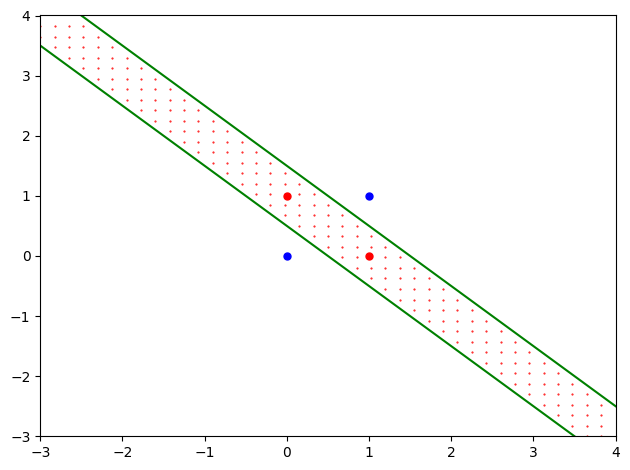

In [4]:
plot.axis([-3, +4, -3, +4])

colors = { 0: 'blue', 1: 'red' }
# plot the weights of the hidden layer
h1_xs = [-3, +4]
h1_ys = [-(weights['h1']['w1'] * x + weights['h1']['w0'] * 1) / weights['h1']['w2'] for x in h1_xs]
plot.plot(h1_xs, h1_ys, color='green')
h2_xs = [-3, +4]
h2_ys = [-(weights['h2']['w1'] * x + weights['h2']['w0'] * 1) / weights['h2']['w2'] for x in h2_xs]
plot.plot(h2_xs, h2_ys, color='green')

# plot the rows
for row in rows:
    plot.plot(row['x1'], row['x2'], marker='o', color=colors[row["target"]], markersize=5)

# plot the predictions
d = 40
for dx in range(d):
    x = -3 + dx * 7 / d
    for dy in range(d):
        y = -3 + dy * 7 / d
        row = { 'x0': 1, 'x1': x, 'x2': y }
        output = compute_output(row, weights)
        if output == 1:
            plot.plot(x, y, marker='.', color=colors[output], markersize=1)
plot.tight_layout()